In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## 2-A
Load the data from each text file.

In [7]:
data = np.loadtxt('segmentation_data.txt', delimiter=',')
colnames = np.loadtxt('segmentation_names.txt', dtype=str)
classes = np.loadtxt('segmentation_classes.txt', delimiter='\t', dtype=str)

Min-max scale the data.

In [29]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data[:3]

array([[4.30830040e-01, 7.41666667e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.42205474e-02, 6.72233922e-04, 2.73291926e-02,
        8.55743510e-04, 9.01110284e-02, 7.94165331e-02, 6.11192912e-02,
        1.30943107e-01, 7.31343290e-01, 1.41176540e-02, 8.72865267e-01,
        1.23711348e-01, 5.08138840e-01, 8.31849232e-01],
       [3.35968379e-01, 7.33333333e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.80228046e-02, 7.26095734e-04, 3.22981359e-02,
        5.41219947e-04, 9.57913810e-02, 8.50891441e-02, 6.84830672e-02,
        1.34840205e-01, 7.29477615e-01, 2.35294199e-02, 8.59582565e-01,
        1.27393216e-01, 4.63329080e-01, 8.36986460e-01],
       [8.85375494e-01, 9.70833333e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.15969577e-01, 2.21344355e-03, 6.70807367e-02,
        1.09658970e-03, 8.54634659e-02, 7.53646732e-02, 6.18556741e-02,
        1.20031165e-01, 7.36940304e-01, 3.88235327e-02, 8.27324481e-01,
        1.13402054e-01

In [23]:
class_name = []
class_num = []

for c in classes:
    class_name.append(c[0])
    class_num.append(c[1])

## 2-B
Perform KMeans on the data using K = 7. Default distance metric for KMeans is Euclidean distance.

In [32]:
clusters = KMeans(n_clusters=7, random_state=46732).fit_predict(scaled_data)

Calculate the cluster centroids.

In [56]:
centroids = {}
for i in range(len(clusters)):
    if clusters[i] in list(centroids.keys()):
        centroids[clusters[i]].append(scaled_data[i])
    else:
        centroids[clusters[i]] = [scaled_data[i]]

In [61]:
for key in sorted(list(centroids.keys())):
    mean = np.mean(centroids[key], axis=0)
    print('Cluster:', key)
    print('Centroid:', mean)
    print('--------------------------------------------------------')

Cluster: 0
Centroid: [1.46455863 0.87027778 0.         0.         0.83333333 2.12661604
 1.2260525  1.66699783 0.99159032 0.94574407 0.83749326 1.09018164
 0.89550531 1.34129356 1.29364707 1.2490829  1.09018164 1.09654001
 0.32246736]
--------------------------------------------------------
Cluster: 1
Centroid: [0.63501493 1.24268573 0.         0.17751479 0.05621302 0.17425624
 0.0109519  0.14280078 0.01153783 0.27322877 0.24907215 0.35454883
 0.20996308 2.24456491 0.84914725 1.25944935 0.35689304 1.67751799
 0.60709605]
--------------------------------------------------------
Cluster: 2
Centroid: [1.60276680e+00 4.49055556e-01 0.00000000e+00 8.33333308e-02
 5.00000000e-03 9.05196507e-02 1.62568553e-03 8.02484461e-02
 1.75897191e-03 2.46467690e+00 2.33447058e+00 2.67693915e+00
 2.36139770e+00 8.10702789e-01 1.99460001e+00 8.65831803e-01
 2.67693915e+00 6.33833246e-01 3.74456705e-01]
--------------------------------------------------------
Cluster: 3
Centroid: [1.61104809 2.34053374 0. 

Calculate completeness and homogeneity scores for the clusters.

In [60]:
com = completeness_score(class_num,clusters)
hom = homogeneity_score(class_num,clusters)
print(f'Completeness Score: {com:.3f}')
print(f'Homogeneity Score: {hom:.3f}')

Completeness Score: 0.621
Homogeneity Score: 0.574


## 2-C
Perform PCA on the data.

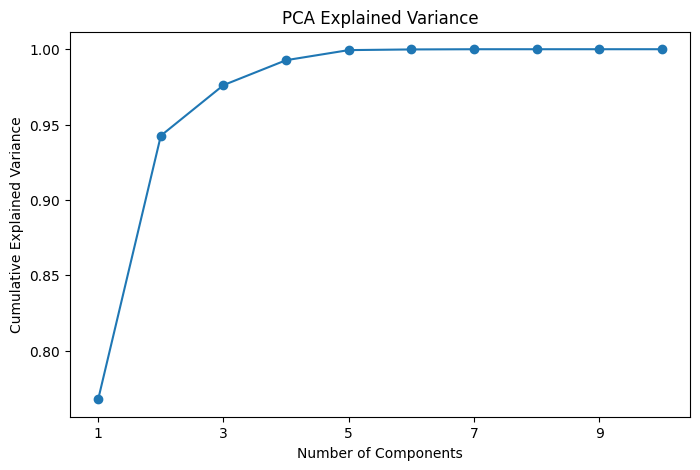

In [94]:
pca = PCA(n_components=10)
pca.fit(scaled_data)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.xticks(ticks=range(0,len(np.cumsum(pca.explained_variance_ratio_)),2), labels=range(1,11,2))
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

Using 3 components captures more than 95% of the variance in the data. We can perform PCA again to transform the data to 3 principal components.

In [95]:
pca3 = PCA(n_components=3)
img_pca = pca3.fit_transform(scaled_data)
img_pca[:5]

array([[ 9.85798483e+02, -3.94738966e+02,  3.92721864e+02],
       [-2.54735051e+00, -7.58936305e-01,  5.37888859e-01],
       [-2.26543719e+00, -8.25637323e-01,  6.00415559e-01],
       [-2.52911750e+00, -8.26485935e-01,  5.40023515e-01],
       [-2.52460547e+00, -7.36183906e-01,  5.41744412e-01]])

## 2-D
Perform KMeans again on the PCA data.

In [96]:
pca_clusters = KMeans(n_clusters=7, random_state=46732).fit_predict(img_pca)

In [97]:
pca_com = completeness_score(class_num,pca_clusters)
pca_hom = homogeneity_score(class_num,pca_clusters)
print(f'Completeness Score: {pca_com:.3f}')
print(f'Homogeneity Score: {pca_hom:.3f}')

Completeness Score: 0.225
Homogeneity Score: 0.003


## 2-E
Both the completeness and homogeneity score for the PCA clusters are significantly worse than the clusters using the normalized data. The homogeneity score of 0.003 suggests that there were no patterns found in the data and the clusters are completely random. Compared to normalized data's homogeneity score of 0.574 which means that over 50% of the points in each cluster belong to one class. 